In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

In [2]:
query = "Laptops"
num_pages = 20
base_url = "https://www.amazon.in/s?k=laptop&crid=3JRU8ZL1GA8R2&sprefix=laptop%2Caps%2C272&ref=nb_sb_noss_2"

In [3]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/120.0.0.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
    "Accept-Encoding": "gzip, deflate, br",
    "Referer": "https://www.google.com/",
    "DNT": "1",
    "Connection": "keep-alive"
}


In [4]:
all_data = []

for page in range(1, num_pages + 1):
    print(f"\n🔹 Scraping Page {page}...")
    params = {"k": query, "page": page}
    response = requests.get(base_url, headers=headers, params=params)

     # detect block
    if "Robot Check" in response.text or "captcha" in response.text.lower():
        print(f"⚠️ Blocked by Amazon on page {page}. Skipping...")
        continue

    soup = BeautifulSoup(response.text, "html.parser")
    items = soup.select("div[data-component-type='s-search-result']")

    if not items:
        print("⚠️ No products found on this page.")
        continue

    for item in items:
        # --- Product Name ---
        name_tag = item.h2
        product_name = name_tag.text.strip() if name_tag else "N/A"

        # --- Price ---
        price_tag = item.select_one("span.a-price-whole")
        price = price_tag.text.strip().replace(",", "") if price_tag else "N/A"

        # --- Ratings ---
        rating_tag = item.select_one("span.a-icon-alt")
        rating = rating_tag.text.strip() if rating_tag else "N/A"

        # --- Number of Reviews ---
        reviews_tag = item.select_one("span[aria-label$='ratings']")
        reviews = reviews_tag.text.strip() if reviews_tag else "N/A"

        # --- Category (from query) ---
        category = query.capitalize()

        all_data.append({
            "Product Name": product_name,
            "Price": price,
            "Category": category,
            "Ratings": rating,
            "Number of Reviews": reviews
        })

    time.sleep(3)  # avoid blocking

df = pd.DataFrame(all_data)

if not df.empty:
    df.to_csv("amazon_dataset.csv", index=False, encoding="utf-8-sig")
    print("\n Data saved successfully to amazon_dataset.csv")
    print(df.head())
else:
    print("\n No data scraped. Try again or change keyword.")




🔹 Scraping Page 1...

🔹 Scraping Page 2...

🔹 Scraping Page 3...

🔹 Scraping Page 4...

🔹 Scraping Page 5...

🔹 Scraping Page 6...

🔹 Scraping Page 7...

🔹 Scraping Page 8...

🔹 Scraping Page 9...

🔹 Scraping Page 10...

🔹 Scraping Page 11...

🔹 Scraping Page 12...

🔹 Scraping Page 13...

🔹 Scraping Page 14...

🔹 Scraping Page 15...

🔹 Scraping Page 16...

🔹 Scraping Page 17...

🔹 Scraping Page 18...

🔹 Scraping Page 19...

🔹 Scraping Page 20...

 Data saved successfully to amazon_dataset.csv
                                        Product Name   Price Category  \
0  HP 255 G10 Laptop for Home or Work, 16GB RAM, ...   32490  Laptops   
1  HP 15, Intel Core Ultra 5 125H (16GB DDR5, 1TB...   64990  Laptops   
2  HP Ultra7-155U / 16GB (1x16GB) DDR5 RAM/512 GB...  118750  Laptops   
3  Dell 15, AMD Ryzen 3 7320U Processor (8GB RAM ...   28990  Laptops   
4  Lenovo V15 G4 AMD Athlon Silver 7120U Laptop 8...   26990  Laptops   

              Ratings Number of Reviews  
0  4.6 out of 5 star

# **2. Data Cleaning**

 Load the CSV file

In [5]:
import numpy as np
df = pd.read_csv("amazon_dataset.csv")
df.head()

,Product Name,Price,Category,Ratings,Number of Reviews
0,"HP 255 G10 Laptop for Home or Work, 16GB RAM, ...",32490.0,Laptops,4.6 out of 5 stars,NaN
1,"HP 15, Intel Core Ultra 5 125H (16GB DDR5, 1TB...",64990.0,Laptops,3.9 out of 5 stars,NaN
2,HP Ultra7-155U / 16GB (1x16GB) DDR5 RAM/512 GB...,118750.0,Laptops,NaN,NaN
3,"Dell 15, AMD Ryzen 3 7320U Processor (8GB RAM ...",28990.0,Laptops,4.0 out of 5 stars,NaN
4,Lenovo V15 G4 AMD Athlon Silver 7120U Laptop 8...,26990.0,Laptops,4.0 out of 5 stars,NaN


In [6]:
df.shape

(324, 5)

In [7]:
# Handle missing values
df.dropna(subset=["Product Name"], inplace=True)

In [8]:
# Clean and standardize
df['Price'] = df['Price'].astype(str).str.replace('[^0-9.]', '', regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Ratings'] = df['Ratings'].astype(str).str.extract(r'(\d+\.\d+|\d+)')
df['Ratings'] = pd.to_numeric(df['Ratings'], errors='coerce')
df['Number of Reviews'] = df['Number of Reviews'].astype(str).str.replace(',', '', regex=True)
df['Number of Reviews'] = pd.to_numeric(df['Number of Reviews'], errors='coerce')

In [9]:
# Remove duplicates
df.drop_duplicates(subset=["Product Name"], inplace=True)

# Fill missing values
df["Ratings"].fillna(df["Ratings"].mean(), inplace=True)
df["Number of Reviews"].fillna(0, inplace=True)

/tmp/ipython-input-1480742238.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Ratings"].fillna(df["Ratings"].mean(), inplace=True)
/tmp/ipython-input-1480742238.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [10]:
# Add a 'Category' column manually (if not scraped)
df["Category"] = "Headphones"

# Save cleaned data
df.to_csv("amazon_cleaned_data.csv", index=False)
print("✅ Cleaned data saved as amazon_cleaned_data.csv")

✅ Cleaned data saved as amazon_cleaned_data.csv


### EDA (Exploratory Data Analysis):

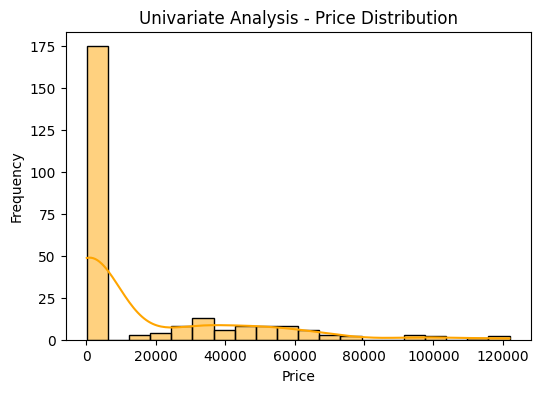

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("amazon_cleaned_data.csv")

# 1.UNIVARIATE ANALYSIS

plt.figure(figsize=(6,4))
sns.histplot(df['Price'], bins=20, kde=True, color='orange')
plt.title("Univariate Analysis - Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


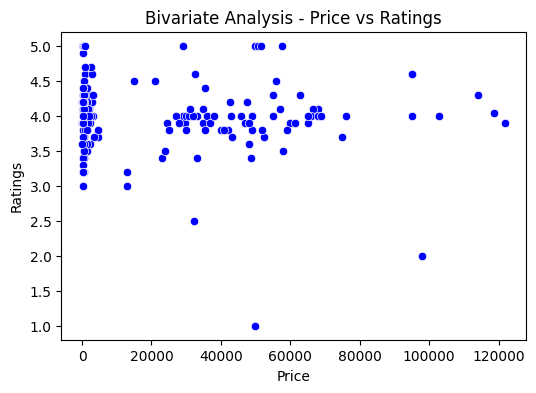

In [12]:
# 2.BIVARIATE ANALYSIS

plt.figure(figsize=(6,4))
sns.scatterplot(x='Price', y='Ratings', data=df, color='blue')
plt.title("Bivariate Analysis - Price vs Ratings")
plt.xlabel("Price")
plt.ylabel("Ratings")
plt.show()

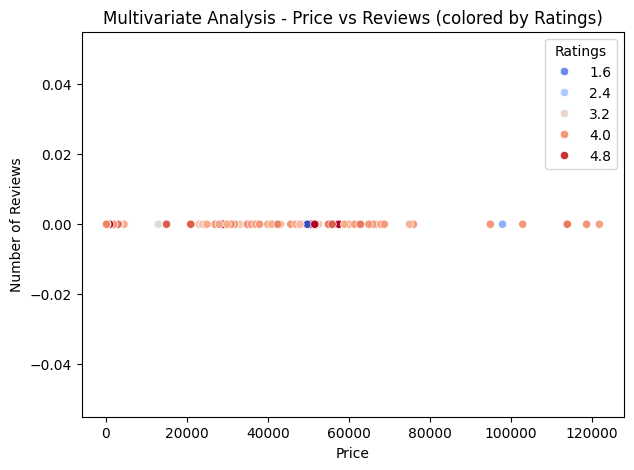

In [13]:
# 3️.MULTIVARIATE ANALYSIS

plt.figure(figsize=(7,5))
sns.scatterplot(x='Price', y='Number of Reviews', hue='Ratings', data=df, palette='coolwarm')
plt.title("Multivariate Analysis - Price vs Reviews (colored by Ratings)")
plt.xlabel("Price")
plt.ylabel("Number of Reviews")
plt.show()

# **3. Data Storage**

In [14]:
#Install and use a database library — e.g., sqlite3 or SQLAlchemy.

#Create a database file:

import sqlite3
conn = sqlite3.connect('ecommerce.db')
df.to_sql('products', conn, if_exists='replace', index=False)

252

In [15]:
pd.read_sql_query("SELECT * FROM products LIMIT 5", conn)

,Product Name,Price,Category,Ratings,Number of Reviews
0,"HP 255 G10 Laptop for Home or Work, 16GB RAM, ...",32490.0,Headphones,4.600000,0.0
1,"HP 15, Intel Core Ultra 5 125H (16GB DDR5, 1TB...",64990.0,Headphones,3.900000,0.0
2,HP Ultra7-155U / 16GB (1x16GB) DDR5 RAM/512 GB...,118750.0,Headphones,4.031984,0.0
3,"Dell 15, AMD Ryzen 3 7320U Processor (8GB RAM ...",28990.0,Headphones,4.000000,0.0
4,Lenovo V15 G4 AMD Athlon Silver 7120U Laptop 8...,26990.0,Headphones,4.000000,0.0


## **4.Unsupervised Learning**





In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load cleaned data
df = pd.read_csv("amazon_cleaned_data.csv")

# Features for clustering
X = df[["Price", "Ratings", "Number of Reviews"]].fillna(0)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Save clustered data
df.to_csv("amazon_clustered_data.csv", index=False)
print("✅ Clustering complete. File saved as amazon_clustered_data.csv")

✅ Clustering complete. File saved as amazon_clustered_data.csv


## Visualize the clusters

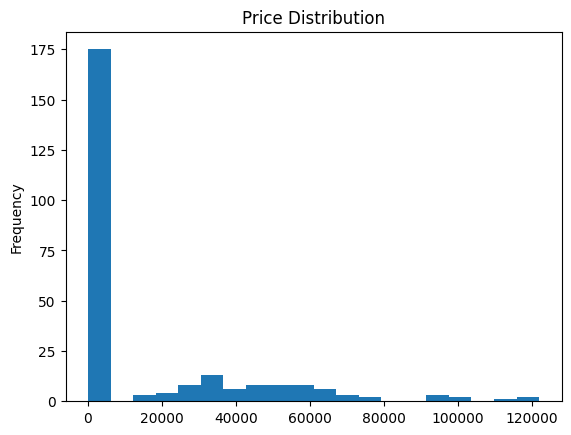

In [17]:
import matplotlib.pyplot as plt

df = pd.read_csv("amazon_cleaned_data.csv")
df["Price"].plot(kind="hist", bins=20, title="Price Distribution")
plt.show()

# **5.Supervised Learning**

. Logistic Regression

. Support Vector Machine (SVM)

. k-Nearest Neighbors (k-NN)

. Random Forest

. XGBoost



In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the clustered data
df = pd.read_csv("amazon_clustered_data.csv")

# Features and target
X = df[["Price", "Ratings", "Number of Reviews"]]
y = df["Cluster"]

# Split into training & test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000), # Increased max_iter for convergence
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss')
}

model_accuracies = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_imputed, y_train)
    y_pred = model.predict(X_test_imputed)
    acc = accuracy_score(y_test, y_pred)
    model_accuracies[name] = acc # Store accuracy
    print(f"\n📘 {name} - Accuracy: {acc:.3f}")
    print(classification_report(y_test, y_pred))

Training Logistic Regression...

📘 Logistic Regression - Accuracy: 0.922
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        25
           1       1.00      0.73      0.85        15
           2       1.00      1.00      1.00        11

    accuracy                           0.92        51
   macro avg       0.95      0.91      0.92        51
weighted avg       0.93      0.92      0.92        51

Training SVM...

📘 SVM - Accuracy: 0.706
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        25
           1       0.00      0.00      0.00        15
           2       0.92      1.00      0.96        11

    accuracy                           0.71        51
   macro avg       0.52      0.67      0.58        51
weighted avg       0.51      0.71      0.59        51

Training k-NN...

📘 k-NN - Accuracy: 0.745
              precision    recall  f1-score   support

           0       0.74   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



📘 Random Forest - Accuracy: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        11

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51

Training XGBoost...

📘 XGBoost - Accuracy: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        11

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



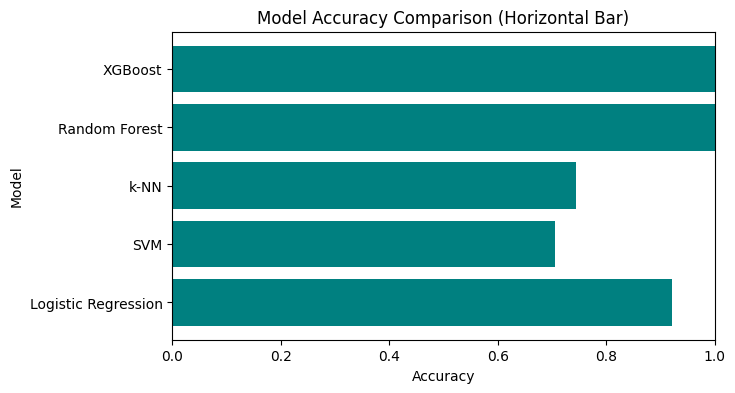

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.barh(list(model_accuracies.keys()), list(model_accuracies.values()), color='teal')
plt.title("Model Accuracy Comparison (Horizontal Bar)")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.show()

### **Evaluate Model Performance:**

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        11

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51

[[25  0  0]
 [ 0 15  0]
 [ 0  0 11]]


**6.Hyperparameter Tuning**

Use GridSearchCV or RandomizedSearchCV to find the best parameters:

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("✅ Best Parameters:", grid_search.best_params_)
print("✅ Best Accuracy:", grid_search.best_score_)


✅ Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
✅ Best Accuracy: 0.9702439024390245


In [23]:
df1=df

In [24]:
df1

,Product Name,Price,Category,Ratings,Number of Reviews,Cluster
0,"HP 255 G10 Laptop for Home or Work, 16GB RAM, ...",32490.0,Headphones,4.600000,0.0,0
1,"HP 15, Intel Core Ultra 5 125H (16GB DDR5, 1TB...",64990.0,Headphones,3.900000,0.0,2
2,HP Ultra7-155U / 16GB (1x16GB) DDR5 RAM/512 GB...,118750.0,Headphones,4.031984,0.0,2
3,"Dell 15, AMD Ryzen 3 7320U Processor (8GB RAM ...",28990.0,Headphones,4.000000,0.0,2
4,Lenovo V15 G4 AMD Athlon Silver 7120U Laptop 8...,26990.0,Headphones,4.000000,0.0,2
...,...,...,...,...,...,...
247,Gizga Essentials Reversible Laptop Sleeve 15.6...,199.0,Headphones,4.200000,0.0,0
248,Sounce LCD Screen Cleaning 3 in 1 Screen Clean...,209.0,Headphones,4.200000,0.0,0
249,Replacement Dell Laptop Charger 65w 19.5V 3.34...,949.0,Headphones,5.000000,0.0,0
250,Pattern D12 Top+Wrist Pad Vinyl Laptop Skin/St...,279.0,Headphones,3.000000,0.0,1
